# Wine Dimensionality Reduction

Dimensionality reduction is an unsupervised learning task that aims to represent the data in a coordinate system with fewed dimensions, while preserving as much information as possible. For this task, Principal Component Analysis (PCA) will be used on the wine dataset to decorrelate the data and transform the feature space into a lower-dimensional one. 

**Main Objectives and Tasks:**
- <u>Import the data</u>
- Exploratory Data Analysis (EDA)
    - class distributions, correlation matrix, summary statistics, and scatterplots.
- <u>Preprocess the data.</u>
- <u>Build Principal Component Analysis (PCA)</u>
- <u>Hyperparameter Tuning</u>
    - <u>Find number k using explained variance threshold (e.g., 95%)</u>
    - <u>Visualize how variance changes with k</u>
- Predict on new data
    - Apply same standardization and projection steps
    - Use transformed features to split a simple classifier
    - Evaluate accuracy
- Interpret and provide conclusions.
    - How much variance is retained.
    - Interpret PCs
    - Mention patterns in reduced space.

**Extra:**
- Build PCA from scratch and modularize it, standardize, covariance_matrix, eigen_decomposition, project
- Plot transformed feature space - 2D scatterplot of PC1 vs. PC2 (color-coded if labeled data)
- Explained variance plot (scree plot or cumulative variance).
- Add the theory from class into your notebook.
- Visualizae eigenvectors as arrow (if input features interpretable)
- Original vs. reconstructed data.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## PCA Implementation

**Principal Component Analysis** (PCA) is used for dimensionality reduction, it decorrelates and expresses the data in a lower-dimensional space. PCA is used for:
- Visualizing high-dimensional data (by transforming it).
- Extracting meaningful features from the data.
- Compressing the data while preserving most of the information.

In [4]:
# TO do

## Importing the Data

In [6]:
wine = pd.read_csv('wine.data')

In [7]:
wine = wine.rename(columns={'1':"Cultivar", '14.23': "Alcohol", '1.71': "Malic acid", '2.43': "Ash", '15.6': "Alcalinity of ash", '127': "Magnesium", '2.8': "Total phenols",
                    '3.06': "Flavanoids", '.28': "Nonflavanoid phenols", '2.29': "Proanthocyanins", '5.64': "Color intensity", '1.04': "Hue", '3.92': "OD280/OD315 of diluted wines",
                    '1065': "Proline"})
wine.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [8]:
wine.describe()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivar                      177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

All columns contain have continuous data and there are no missing values. Moreover, the scales of the data do not appear to differ too largely.

## Exploratory Data Analysis (EDA)

In [12]:
x = wine.drop('Cultivar', axis=1)
y = wine['Cultivar']

## Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(x)

In [15]:
x_scaled

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

## Build Principal Component Analysis (PCA) model

In [17]:
from sklearn.decomposition import PCA


# Transform the dataset into its representation
pca = PCA()
pca.fit_transform(x_scaled)

array([[ 2.23024297e+00,  3.02312771e-01, -2.03292031e+00, ...,
        -1.53252480e-01,  4.01035434e-01,  1.90075165e-03],
       [ 2.53192196e+00, -1.06225676e+00,  9.76724345e-01, ...,
        -2.75374487e-01,  3.37993750e-03,  2.16061261e-02],
       [ 3.75467731e+00, -2.80530871e+00, -1.80370131e-01, ...,
         6.96435417e-01, -2.41099816e-01, -3.70465986e-01],
       ...,
       [-2.69214577e+00, -2.73987492e+00, -9.23111537e-01, ...,
         5.52276789e-01,  6.87923707e-01,  7.12808507e-02],
       [-2.39839363e+00, -2.27992875e+00, -5.37481419e-01, ...,
         2.34556504e-01,  3.57223231e-01, -2.37873761e-02],
       [-3.21585159e+00, -2.74059303e+00,  1.01246947e+00, ...,
        -2.34443669e-01, -1.74567412e-01, -3.24642181e-01]])

## Hyperparameter Tuning, Plotting, and Analysis

In [19]:
explained_variance_ratio = pca.explained_variance_ / np.sum(pca.explained_variance_)
explained_variance_ratio

array([0.35983071, 0.1924128 , 0.1117946 , 0.07111109, 0.06628744,
       0.04960367, 0.04246014, 0.02697991, 0.02224462, 0.01898528,
       0.01734155, 0.01295206, 0.00799613])

This is the ratio of explained total variance provided by all the 13 principal components. With the aim of retaining 95% of the variance, a scree plot will displayed and a cumulative variance plot for all the principal components as they are progressively kept.

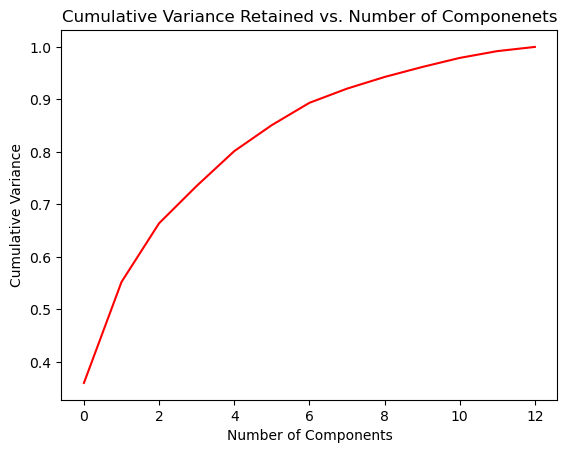

In [21]:
n_components = range(pca.n_components_)
cumulative_var = []
total=0
for i in range(len(explained_variance_ratio)):
    total = total + explained_variance_ratio[i]
    cumulative_var.append(total)

sns.lineplot(y=cumulative_var, x=n_components, color="red")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.title("Cumulative Variance Retained vs. Number of Componenets")
plt.show()

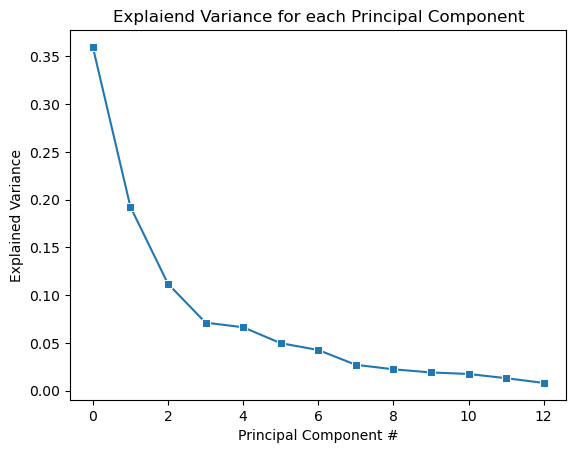

In [22]:
# Scree plot
sns.lineplot(y=explained_variance_ratio, x=n_components, marker="s")
plt.xlabel("Principal Component #")
plt.ylabel("Explained Variance")
plt.title("Explaiend Variance for each Principal Component")
plt.show()

Based off the graph, it looks like the first 9 PCs retain 95% of the total explained variance, so the dataset can be reduced in its dimensions without much loss of information. Therefore, k=9 is the optimal choice for dimensionality reduction.

However, for visualization purposes, a new PCA model will be created that will retain only the first two dims, and another with only the first 3 dims.

In [24]:
PCA_2D = PCA(n_components=2)
PCA_3D = PCA(n_components=3)

codes_2D = PCA_2D.fit_transform(x_scaled)
codes_3D = PCA_3D.fit_transform(x_scaled)

PCA_2D.components_, PCA_3D.components_

(array([[ 0.13788809, -0.24638109, -0.0043183 , -0.23737955,  0.1350017 ,
          0.39586939,  0.42439422, -0.29913568,  0.31280321, -0.09328558,
          0.29956536,  0.37720252,  0.28428101],
        [-0.48583464, -0.22157478, -0.31528188,  0.01214349, -0.30028828,
         -0.07054905, -0.00173207, -0.02466918, -0.04144561, -0.52801878,
          0.27405069,  0.16544914, -0.3695384 ]]),
 array([[ 0.13788809, -0.24638109, -0.0043183 , -0.23737955,  0.1350017 ,
          0.39586939,  0.42439422, -0.29913568,  0.31280321, -0.09328558,
          0.29956536,  0.37720252,  0.28428101],
        [-0.48583464, -0.22157478, -0.31528188,  0.01214349, -0.30028828,
         -0.07054905, -0.00173207, -0.02466918, -0.04144561, -0.52801878,
          0.27405069,  0.16544914, -0.3695384 ],
        [-0.20877489,  0.09019328,  0.62374304,  0.61379873,  0.13573164,
          0.14462048,  0.14931754,  0.16913634,  0.15060183, -0.13608317,
          0.08255118,  0.16681112, -0.12803431]]))

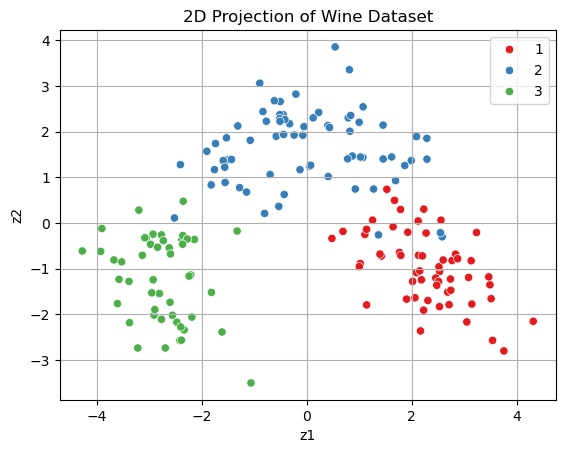

In [25]:
labels = [1, 2, 3]
sns.scatterplot(x=codes_2D[:, 0], y=codes_2D[:, 1], hue=y, palette="Set1")
plt.title('2D Projection of Wine Dataset')
plt.xlabel('z1')
plt.legend()
plt.grid(True)
plt.ylabel('z2')
plt.show()

The graph shows that PCA separates the wine classes relatively well in two dimensions. Now to see how well PCA separates the wine classes in three dimensions.

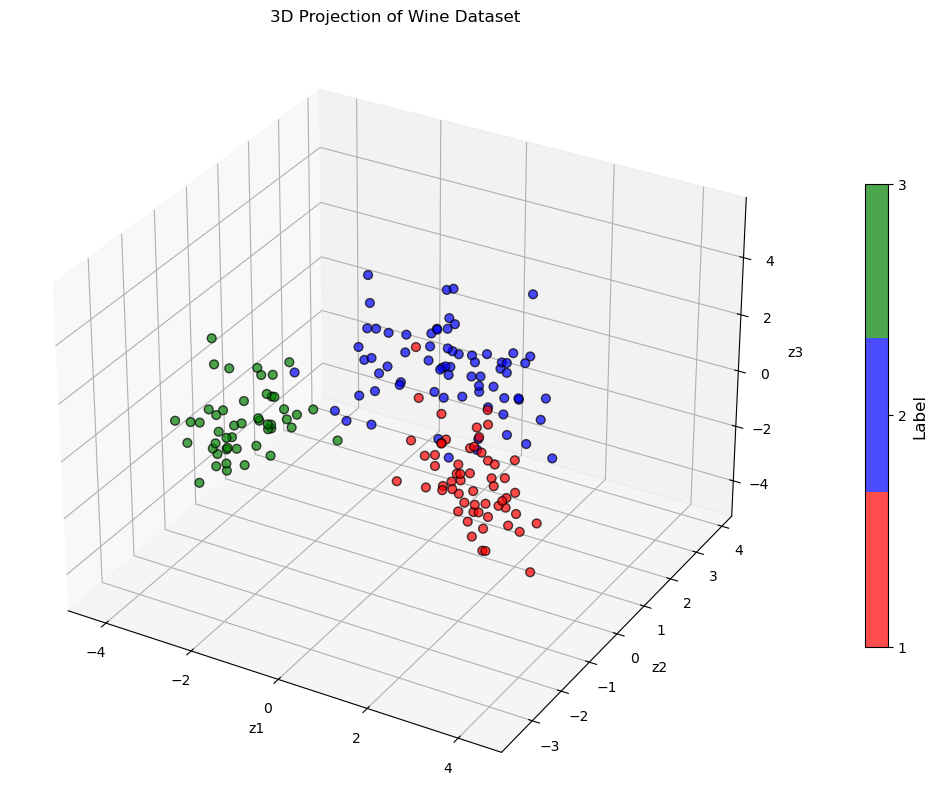

In [53]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue', 'green'])
labels = [1, 2, 3]
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
ax = plt.axes(projection='3d')
ax.set_title('3D Projection of Wine Dataset')
fg = ax.scatter3D(codes_3D[:, 0], codes_3D[:, 1], codes_3D[:, 2], edgecolor='k', c=y, s=40, alpha=0.7, cmap=cmap)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')
cbar = fig.colorbar(fg, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Label', fontsize=12)
cbar.set_ticks(labels)
plt.show()